In [30]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [31]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

In [32]:
NUM_CLASSES = 26

In [33]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [34]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [36]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
#     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(21*2, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(21*2, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 42)                1806      
                                                                 
 dense_4 (Dense)             (None, 42)                1806      
                                                                 
 dense_5 (Dense)             (None, 26)                1118      
                                                                 
Total params: 4,730
Trainable params: 4,730
Non-trainable params: 0
_________________________________________________________________


In [38]:
# model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [39]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [40]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 22/367 [>.............................] - ETA: 1s - loss: 3.1610 - accuracy: 0.0753

2022-06-04 23:31:12.709297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


361/367 [============================>.] - ETA: 0s - loss: 1.5214 - accuracy: 0.6265

2022-06-04 23:31:14.592386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
367/367 [==============================] - 2s 6ms/step - loss: 1.5081 - accuracy: 0.6304 - val_loss: 0.5991 - val_accuracy: 0.8828
Epoch 2/1000
357/367 [============================>.] - ETA: 0s - loss: 0.4524 - accuracy: 0.9012
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
367/367 [==============================] - 2s 6ms/step - loss: 0.4487 - accuracy: 0.9023 - val_loss: 0.3554 - val_accuracy: 0.9220
Epoch 3/1000
360/367 [============================>.] - ETA: 0s - loss: 0.3019 - accuracy: 0.9296
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
367/367 [==============================] - 2s 6ms/step - loss: 0.3018 - accuracy: 0.9299 - val_loss: 0.2702 - val_accuracy: 0.9387
Epoch 4/1000
360/367 [============================>.] - ETA: 0s - loss: 0.2377 - accuracy: 0.9487
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
367/367 

367/367 [==============================] - ETA: 0s - loss: 0.0650 - accuracy: 0.9834
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
367/367 [==============================] - 2s 6ms/step - loss: 0.0650 - accuracy: 0.9834 - val_loss: 0.0833 - val_accuracy: 0.9797
Epoch 29/1000
358/367 [============================>.] - ETA: 0s - loss: 0.0637 - accuracy: 0.9837
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
367/367 [==============================] - 2s 6ms/step - loss: 0.0632 - accuracy: 0.9839 - val_loss: 0.0803 - val_accuracy: 0.9801
Epoch 30/1000
363/367 [============================>.] - ETA: 0s - loss: 0.0615 - accuracy: 0.9843
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
367/367 [==============================] - 2s 6ms/step - loss: 0.0615 - accuracy: 0.9843 - val_loss: 0.0796 - val_accuracy: 0.9813
Epoch 31/1000
359/367 [============================>.] - ETA: 0s - loss: 0.0609 - accuracy: 0

Epoch 55/1000
363/367 [============================>.] - ETA: 0s - loss: 0.0380 - accuracy: 0.9899
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
367/367 [==============================] - 2s 6ms/step - loss: 0.0379 - accuracy: 0.9899 - val_loss: 0.0639 - val_accuracy: 0.9849
Epoch 56/1000
362/367 [============================>.] - ETA: 0s - loss: 0.0377 - accuracy: 0.9901
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
367/367 [==============================] - 2s 6ms/step - loss: 0.0376 - accuracy: 0.9901 - val_loss: 0.0651 - val_accuracy: 0.9840
Epoch 57/1000
365/367 [============================>.] - ETA: 0s - loss: 0.0365 - accuracy: 0.9905
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
367/367 [==============================] - 2s 6ms/step - loss: 0.0365 - accuracy: 0.9905 - val_loss: 0.0654 - val_accuracy: 0.9847
Epoch 58/1000
362/367 [============================>.] - ETA: 0s - loss: 0.0363

Epoch 82/1000
363/367 [============================>.] - ETA: 0s - loss: 0.0264 - accuracy: 0.9929
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
367/367 [==============================] - 2s 6ms/step - loss: 0.0263 - accuracy: 0.9929 - val_loss: 0.0609 - val_accuracy: 0.9871
Epoch 83/1000
360/367 [============================>.] - ETA: 0s - loss: 0.0253 - accuracy: 0.9932
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
367/367 [==============================] - 2s 6ms/step - loss: 0.0252 - accuracy: 0.9932 - val_loss: 0.0604 - val_accuracy: 0.9869
Epoch 84/1000
363/367 [============================>.] - ETA: 0s - loss: 0.0257 - accuracy: 0.9927
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
367/367 [==============================] - 2s 6ms/step - loss: 0.0258 - accuracy: 0.9927 - val_loss: 0.0624 - val_accuracy: 0.9861
Epoch 85/1000
363/367 [============================>.] - ETA: 0s - loss: 0.0249

In [51]:
#model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

123/123 [==============================] - 0s 4ms/step - loss: 0.0616 - accuracy: 0.9871


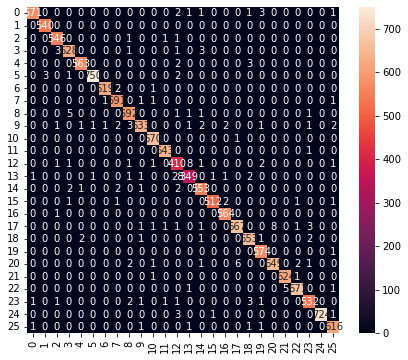

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       580
           1       0.99      1.00      1.00       540
           2       0.99      0.99      0.99       549
           3       0.98      0.99      0.99       636
           4       0.99      0.99      0.99       568
           5       1.00      0.99      0.99       756
           6       1.00      1.00      1.00       622
           7       0.99      0.99      0.99       595
           8       0.98      0.99      0.98       601
           9       0.99      0.97      0.98       651
          10       0.99      1.00      0.99       671
          11       1.00      1.00      1.00       644
          12       0.90      0.96      0.93       426
          13       0.96      0.91      0.93       385
          14       0.98      0.99      0.98       561
          15       1.00      0.99      0.99       518
          16       0.99      1.00      0.99       565
     

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [43]:
model.save(model_save_path, include_optimizer=False)

In [44]:
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# original!!-----------------------------
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops=[
  tf.lite.OpsSet.TFLITE_BUILTINS,
  tf.lite.OpsSet.SELECT_TF_OPS,
]
tflite_quantized_model = converter.convert()


open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/yd/2gs60p_n1yn31qchnyl965sr0000gn/T/tmpxzpcfz6q/assets


INFO:tensorflow:Assets written to: /var/folders/yd/2gs60p_n1yn31qchnyl965sr0000gn/T/tmpxzpcfz6q/assets
2022-06-04 23:35:06.619054: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2022-06-04 23:35:06.619071: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2022-06-04 23:35:06.619156: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/yd/2gs60p_n1yn31qchnyl965sr0000gn/T/tmpxzpcfz6q
2022-06-04 23:35:06.619873: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2022-06-04 23:35:06.619879: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: /var/folders/yd/2gs60p_n1yn31qchnyl965sr0000gn/T/tmpxzpcfz6q
2022-06-04 23:35:06.621677: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-06-04 23:35:06.640149: I tensorflow/cc/saved_model/loader.cc:212] Running initialization

7168

In [45]:
# inference test

In [46]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [47]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [48]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [49]:
%%time
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 431 µs, sys: 136 µs, total: 567 µs
Wall time: 506 µs


In [50]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.8829744e-10 2.9378937e-39 1.4505961e-37 2.8447976e-18 1.0279785e-09
 1.6353864e-35 1.0268547e-14 8.8573071e-16 1.0176630e-06 2.1864049e-07
 1.8691374e-21 1.2260328e-24 2.1978140e-08 4.0495084e-07 1.7941504e-18
 3.3857463e-13 1.1370506e-35 1.1735120e-19 9.9987352e-01 1.2390397e-04
 3.9601941e-14 1.2960755e-24 2.7603544e-19 1.6940486e-07 9.3749776e-15
 6.6180115e-07]
18
